In [1]:
import matplotlib.pyplot as plt
from matplotlib.offsetbox import AnchoredText
import pandas as pd
import numpy as np
import glob as glob
from scipy.interpolate import interp1d

In [2]:
dSphNames = ['CBe','DraI','RetII', 'Scl', 'SgrII', 'UMaII', 'UMi','Wil1']
dSphLabels = [r'DraI (T$_{obs}$=100h)', r'Wil1 (T$_{obs}$=100h)', r'CBe (T$_{obs}$=100h)', r'Scl (T$_{obs}$=100h)',r'RetII (T$_{obs}$=100h)', r'SgrII (T$_{obs}$=100h)']
dSphcolor = ['red','blue','green','black','pink','brown','olive','cyan']
channels = ['b','Tau']
profiles=['Einasto','Burkert']

In [3]:
df_list = []
for name in dSphNames:
    for profile in profiles:
    
        filename = 'sv_limits_quantiles/'+name+'_'+profile+'_Decay.csv'
        df_list.append(pd.read_csv(filename))
        
df_decay_single = pd.concat(df_list, ignore_index=True)
df_decay_single.drop_duplicates(inplace=True)

In [4]:
df = pd.read_csv('sv_limits_quantiles/Combined_Annichilation_CBe_Wil1_T600.csv')
df_decay = pd.read_csv('sv_limits_quantiles/Combined_Decay_CBe_UMi_T600.csv')

# Rescale mass column by 1/1000 to have it in TeV
df['mass'] = df['mass'] / 1000
df_decay['mass'] = df_decay['mass'] / 1000


relic = pd.read_csv('Relic_WIMP_Abundance.tsv',sep='\s+')
relic['mass'] =  relic['mass'] / 1000

In [5]:
df.head()

,Unnamed: 0,src1,src2,profile,ch,mass,quantile,sigma_v
0,0,CBe,Wil1,Burkert,W,0.1,0.05,9.725780e-26
1,1,CBe,Wil1,Burkert,W,0.1,0.32,1.193377e-25
2,2,CBe,Wil1,Burkert,W,0.1,0.50,1.291125e-25
3,3,CBe,Wil1,Burkert,W,0.1,0.68,1.390687e-25
4,4,CBe,Wil1,Burkert,W,0.1,0.95,1.737034e-25


In [6]:
np.unique(df.ch)

array(['W', 'b', 'mu', 'tau'], dtype=object)

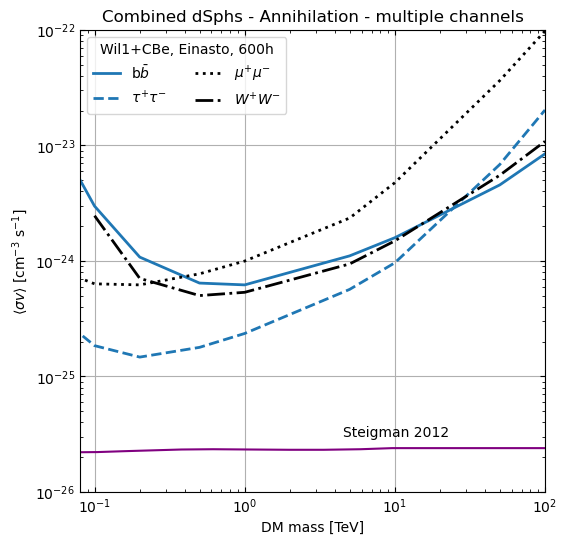

In [7]:
fig = plt.figure(figsize=(6,6))
plt.xlabel("DM mass [TeV]")
plt.ylabel(r"$\langle\sigma v \rangle$ [cm$^{-3}$ s$^{-1}$]")
plt.xlim(8e-2,1e2)
plt.ylim(1e-26,1e-22)
#plt.title(r'Comparison dSph limits - $\tau^+\tau^-$')
plt.title('Combined dSphs - Annihilation - multiple channels')

plt.grid()
plt.tick_params(which='both', direction='in', top=True, right=True)

#dSphNames = ['DraI', 'CBe', 'Wil1', 'RetII', 'Scl', 'SgrII']
#color = ['red','blue','green','black','pink','brown']
#color = ['black','black','black','black','black','black']
#dSphNames = ['Wil1']
color = ['tab:blue','tab:blue','k','k']
profile = 'Einasto'
name='Wil1+CBe 600h'
label = [r'b$\bar{b}$', r'$\tau^{+}\tau^{-}$', r'$\mu^{+}\mu^{-}$', r'$W^{+}W^{-}$']
channel = ['b', 'tau', 'mu','W']

contador = 0
autocolors = plt.rcParams["axes.prop_cycle"]()
for ch,c in zip(channel,color):
    
    
    scale = 1 
    linewidth = 2
    if ch == 'b':
        linestyle = 'solid'
       
    if ch == 'tau':
        linestyle = 'dashed'
        
    if ch == 'mu':
        linestyle = 'dotted'
        
    if ch == 'W':
        linestyle = 'dashdot'
        
    if ch == 'b' or ch == 'tau':
        
        
        """
        mask_dw = (df['quantile'] == 0.05) & (df['ch']==ch) & (df['profile']==profile)
        mask_up = (df['quantile'] == 0.95) & (df['ch']==ch) & (df['profile']==profile)
        plt.fill_between(df[mask_dw]['mass'],
                         df[mask_up]['sigma_v']*scale,
                         df[mask_dw]['sigma_v']*scale, color='gold', alpha=0.4)


        mask_dw = (df['quantile'] == 0.32)  & (df['ch']==ch) & (df['profile']==profile)
        mask_up = (df['quantile'] == 0.68)  & (df['ch']==ch) & (df['profile']==profile)
        plt.fill_between(df[mask_dw]['mass'],
                         df[mask_up]['sigma_v']*scale,
                         df[mask_dw]['sigma_v']*scale, color='yellowgreen', alpha=0.75)
    """
    
    mask = (df['quantile'] == 0.5)  & (df['profile']==profile) & (df['ch']==ch)
    plt.loglog(df[mask]['mass'],df[mask]['sigma_v']*scale, 
               ls=linestyle, linewidth=linewidth, color=c,
               #marker='o',
               label=label[contador]) 
    
    contador = contador + 1
    

    
plt.plot(relic.mass, relic.sigmav,color="purple")
plt.text(x=4.500, y=3e-26, s='Steigman 2012')


plt.legend(title=r'Wil1+CBe, Einasto, 600h',ncol=2)
    #ax = plt.gca()
    #at = AnchoredText(name+"\n"+r"T$_{obs}$=100 h",
    #          loc='upper left', prop=dict(size=16), frameon=True)

    #ax.add_artist(at)
    




#plt.savefig('stacked_Wil1_CBe_NewChannels_Einasto_prod5_T300.pdf', bbox_inches='tight', pad_inches=0.3)
#plt.savefig('stacked_Wil1_CBe_NewChannels_Einasto_prod5_T300.png', bbox_inches='tight', pad_inches=0.3)
plt.savefig('plot_combined_Wil1_CBe_ann_einasto_allch.png', bbox_inches='tight', pad_inches=0.3)



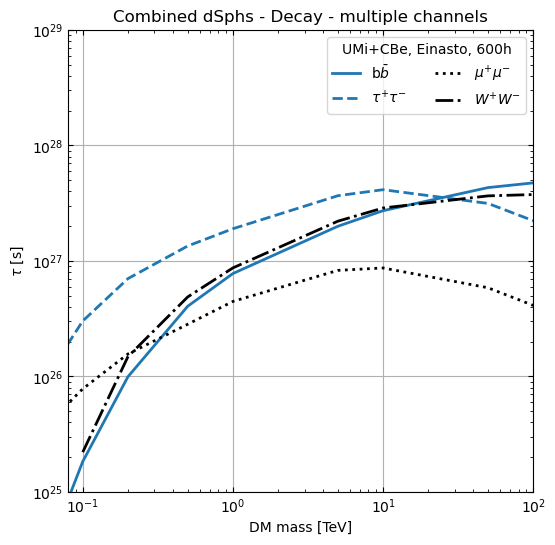

In [8]:
fig = plt.figure(figsize=(6,6))
plt.xlabel("DM mass [TeV]")
plt.ylabel(r"$\tau$ [s]")
plt.xlim(8e-2,1e2)
plt.ylim(1e25,1e29)
#plt.title(r'Comparison dSph limits - $\tau^+\tau^-$')
plt.title('Combined dSphs - Decay - multiple channels')

plt.grid()
plt.tick_params(which='both', direction='in', top=True, right=True)


#dSphNames = ['DraI', 'CBe', 'Wil1', 'RetII', 'Scl', 'SgrII']
#color = ['red','blue','green','black','pink','brown']
#color = ['black','black','black','black','black','black']
#dSphNames = ['Wil1']
color = ['tab:blue','tab:blue','k','k']
profile = 'Einasto'
name='UMi+CBe 600h'
label = [r'b$\bar{b}$', r'$\tau^{+}\tau^{-}$', r'$\mu^{+}\mu^{-}$', r'$W^{+}W^{-}$']
channel = ['b', 'tau', 'mu','W']

contador = 0
autocolors = plt.rcParams["axes.prop_cycle"]()
for ch,c in zip(channel,color):
    
    scale = 1 
    linewidth = 2
    linestyle='--'
    if ch == 'b':
        linestyle = 'solid'
       
    if ch == 'tau':
        linestyle = 'dashed'
        
    if ch == 'mu':
        linestyle = 'dotted'
        
    if ch == 'W':
        linestyle = 'dashdot'
        

    
    mask = (df_decay['quantile'] == 0.5)  & (df_decay['profile']==profile) & (df_decay['ch']==ch)
    plt.loglog(df_decay[mask]['mass'],df_decay[mask]['tau']*scale, 
               ls=linestyle, linewidth=linewidth, color=c,
               #marker='o',
               label=label[contador]) 
    
    contador = contador + 1
    

plt.legend(title=r'UMi+CBe, Einasto, 600h',ncol=2)
    #ax = plt.gca()
    #at = AnchoredText(name+"\n"+r"T$_{obs}$=100 h",
    #          loc='upper left', prop=dict(size=16), frameon=True)

    #ax.add_artist(at)
    

plt.savefig('plot_combined_UMi_CBe_dec_einasto_allch.png', bbox_inches='tight', pad_inches=0.3)

